# Interpolate atmospheric grids

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNRS
- creation date : 2023/02/07


In [1]:
# Import some generally useful packages

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
%matplotlib inline
import pandas as pd
from itertools import cycle, islice
import seaborn as sns
import pickle

In [2]:
# to enlarge the sizes
params = {'legend.fontsize': 'large',
          'figure.figsize': (8, 6),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)


In [3]:
from scipy import interpolate

In [4]:
from libradtranpy import  libsimulateVisible

libradtranpath= /Users/dagoret/MacOSX/External/libRadtran2/


In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
from scipy.interpolate import RegularGridInterpolator

# Configuration

In [7]:
! ls ../data/simplegrid

atmospherictransparencygrid_O2abs_test.npy
atmospherictransparencygrid_O2abs_training.npy
atmospherictransparencygrid_OZabs_test.npy
atmospherictransparencygrid_OZabs_training.npy
atmospherictransparencygrid_PWVabs_test.npy
atmospherictransparencygrid_PWVabs_training.npy
atmospherictransparencygrid_params_test.pickle
atmospherictransparencygrid_params_training.pickle
atmospherictransparencygrid_rayleigh_test.npy
atmospherictransparencygrid_rayleigh_training.npy


In [8]:
file01_in = f"../data/simplegrid/atmospherictransparencygrid_params_training.pickle"
file02_in = f"../data/simplegrid/atmospherictransparencygrid_params_test.pickle"

In [9]:
file1_in = f"../data/simplegrid/atmospherictransparencygrid_rayleigh_training.npy"
file2_in = f"../data/simplegrid/atmospherictransparencygrid_rayleigh_test.npy"

In [10]:
file3_in = f"../data/simplegrid/atmospherictransparencygrid_O2abs_training.npy"
file4_in = f"../data/simplegrid/atmospherictransparencygrid_O2abs_test.npy"

In [11]:
file5_in = f"../data/simplegrid/atmospherictransparencygrid_PWVabs_training.npy"
file6_in = f"../data/simplegrid/atmospherictransparencygrid_PWVabs_test.npy"

In [12]:
file7_in = f"../data/simplegrid/atmospherictransparencygrid_OZabs_training.npy"
file8_in = f"../data/simplegrid/atmospherictransparencygrid_OZabs_test.npy"

### wavelength

In [13]:
WLMIN=300.
WLMAX=1100.
WLBIN=1.
NWLBIN=int((WLMAX-WLMIN)/WLBIN)
WL=np.linspace(WLMIN,WLMAX,NWLBIN)

### airmass

In [14]:
AIRMASSMIN=1.0
AIRMASSMAX=2.6
#AIRMASSMAX=1.1
DAM = 0.1

In [15]:
airmasses = np.arange(AIRMASSMIN,AIRMASSMAX,DAM)

In [16]:
airmasses

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5])

In [17]:
NAM=len(airmasses)

In [18]:
sequential_colors = sns.color_palette("hls", NAM)

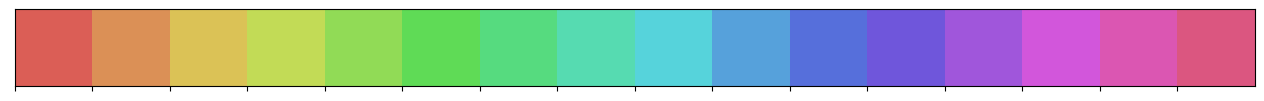

In [19]:
sns.palplot(sequential_colors)

In [20]:
airmass_training = airmasses
airmass_test = airmasses + DAM/2.

In [21]:
NX=len(airmasses)
NY=NWLBIN

### PWV

In [22]:
PWVMIN = 0
PWVMAX = 11
DPWV = 0.5

In [23]:
pwv_training = np.arange(PWVMIN,PWVMAX,DPWV)
pwv_test = pwv_training + DPWV/2.

In [24]:
NPWV = len(pwv_training)

### OZON

In [25]:
OZMIN = 0
OZMAX = 600
DOZ   = 100

In [26]:
oz_training = np.arange(OZMIN,OZMAX,DOZ)
oz_test = oz_training  + DOZ/2.

In [27]:
NOZ = len(oz_training)

# Load Info Dictionaries

In [28]:
with open(file01_in, 'rb') as handle:
    info_params_training = pickle.load(handle)
with open(file02_in, 'rb') as handle:
    info_params_test = pickle.load(handle)

In [29]:
#info_params_training

In [30]:
WLMIN = info_params_training["WLMIN"]
WLMAX = info_params_training["WLMAX"]
WLBIN = info_params_training["WLBIN"]
NWLBIN = info_params_training['NWLBIN']
WL = info_params_training['WL']

In [31]:
AIRMASSMIN = info_params_training['AIRMASSMIN']
AIRMASSMAX = info_params_training['AIRMASSMAX']
NAIRMASS = info_params_training['NAIRMASS']
DAIRMASS = info_params_training['DAIRMASS']
AIRMASS = info_params_training['AIRMASS']

In [32]:
PWVMIN = info_params_training['PWVMIN']
PWVMAX = info_params_training['PWVMAX'] 
NPWV = info_params_training['NPWV']
DPWV = info_params_training['DPWV'] 
PWV = info_params_training['PWV']

In [33]:
OZMIN =  info_params_training['OZMIN']
OZMAX = info_params_training['OZMAX']
NOZ = info_params_training['NOZ']
DOZ =  info_params_training['DOZ'] 
OZ = info_params_training['OZ']

### Load Data Table

In [34]:
with open(file1_in, 'rb') as f:
    data_rayleigh_training=np.load(f)
with open(file2_in, 'rb') as f:    
    data_rayleigh_test=np.load(f)
with open(file3_in, 'rb') as f:  
    data_O2abs_training=np.load(f)
with open(file4_in, 'rb') as f:     
    data_O2abs_test=np.load(f)

In [35]:
with open(file5_in, 'rb') as f:
    data_H2Oabs_training=np.load(f)
with open(file6_in, 'rb') as f:
    data_H2Oabs_test=np.load(f)

In [36]:
with open(file7_in, 'rb') as f:
    data_OZabs_training=np.load(f)
with open(file8_in, 'rb') as f:    
    data_OZabs_test=np.load(f)

# Interpolate

## Interpolate Rayleigh

### Check input table

In [37]:
X = WL
Y = AIRMASS

In [38]:
XX,YY = np.meshgrid(X,Y)

In [39]:
XX.shape

(16, 800)

In [40]:
YY.shape

(16, 800)

In [41]:
Z = data_rayleigh_training.T

In [42]:
Z.shape

(16, 800)

Text(0.5, 1.0, 'Rayleigh transparency')

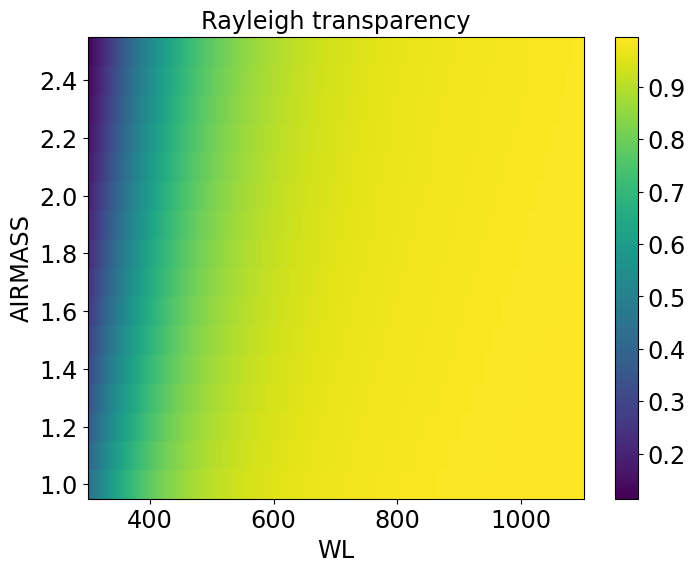

In [43]:
c=plt.pcolor(XX, YY, Z)
plt.colorbar(c)
plt.xlabel("WL")
plt.ylabel("AIRMASS")
the_title = f"Rayleigh transparency"
plt.title(the_title)

### Create Interpolator

In [44]:
fn_rayleigh_train = RegularGridInterpolator((WL,AIRMASS),data_rayleigh_training)

In [45]:
tab = np.zeros((NWLBIN,NAM))

In [46]:
for idx_wl,wl in enumerate(WL):
    for idx_am,am in enumerate(AIRMASS):
        tab[idx_wl,idx_am] = fn_rayleigh_train([wl,am])

Text(0.5, 1.0, 'Rayleigh transparency')

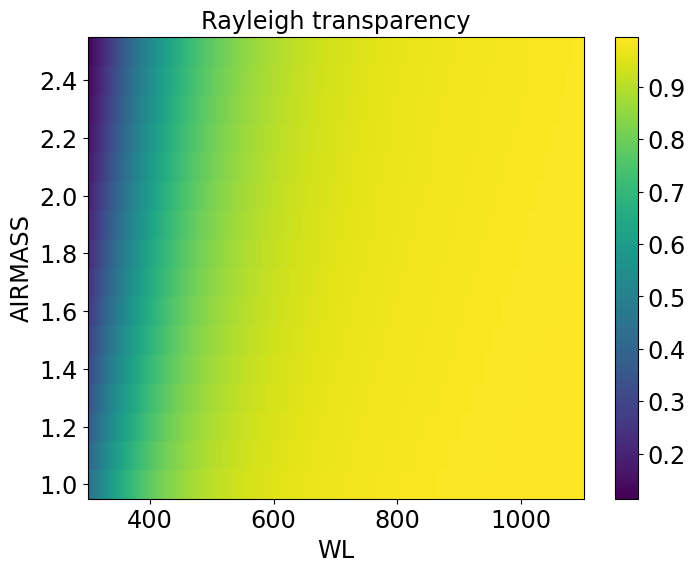

In [47]:
c=plt.pcolor(XX, YY, tab.T)
plt.colorbar(c)
plt.xlabel("WL")
plt.ylabel("AIRMASS")
the_title = f"Rayleigh transparency"
plt.title(the_title)

### Check on test data

## Interpolate O2 absorption

### View input table

In [48]:
X = WL
Y = AIRMASS

In [49]:
Z = data_O2abs_training.T

In [50]:
XX,YY = np.meshgrid(X,Y)

Text(0.5, 1.0, 'O2 absorption transparency')

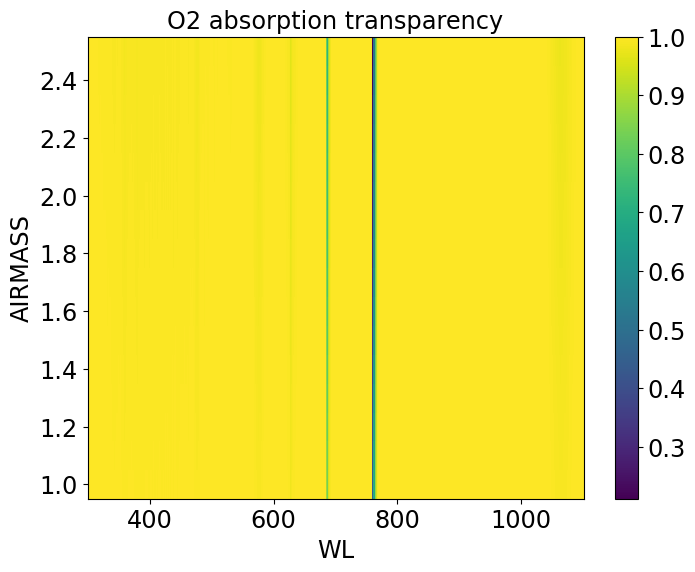

In [51]:
c=plt.pcolor(XX, YY, Z)
plt.colorbar(c)
plt.xlabel("WL")
plt.ylabel("AIRMASS")
the_title = f"O2 absorption transparency"
plt.title(the_title)

In [52]:
fn_O2abs_train = RegularGridInterpolator((WL,AIRMASS),data_O2abs_training)

In [53]:
tab = np.zeros((NWLBIN,NAM))

In [54]:
for idx_wl,wl in enumerate(WL):
    for idx_am,am in enumerate(AIRMASS):
        tab[idx_wl,idx_am] = fn_O2abs_train([wl,am])

Text(0.5, 1.0, 'O2 absorption transparency')

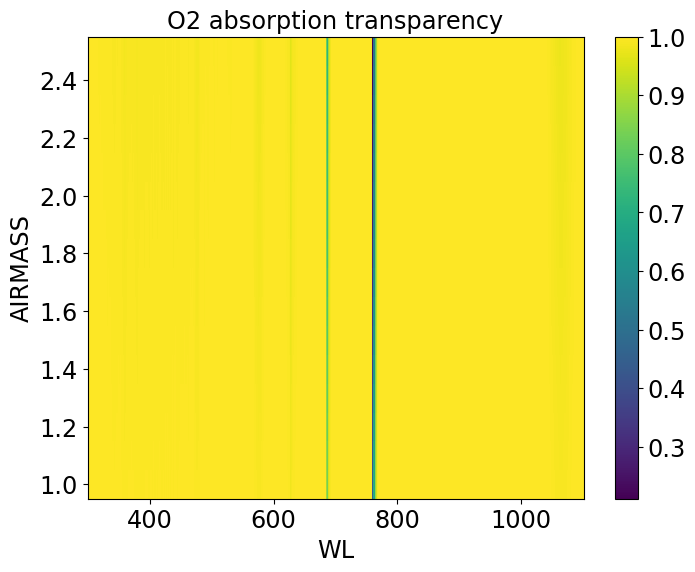

In [55]:
c=plt.pcolor(XX, YY, tab.T)
plt.colorbar(c)
plt.xlabel("WL")
plt.ylabel("AIRMASS")
the_title = f"O2 absorption transparency"
plt.title(the_title)

## Interpolate PWV

In [56]:
X = PWV

In [57]:
Y = AIRMASS

In [58]:
XX,YY = np.meshgrid(X,Y)

In [59]:
idx_wl = 665

In [60]:
the_wl=WL[idx_wl]

In [61]:
data_H2Oabs_training_at665 = data_H2Oabs_training[idx_wl,:,:]
Z= data_H2Oabs_training_at665

Text(0.5, 1.0, 'PWV transparency at $\\lambda$ = 965.83 nm')

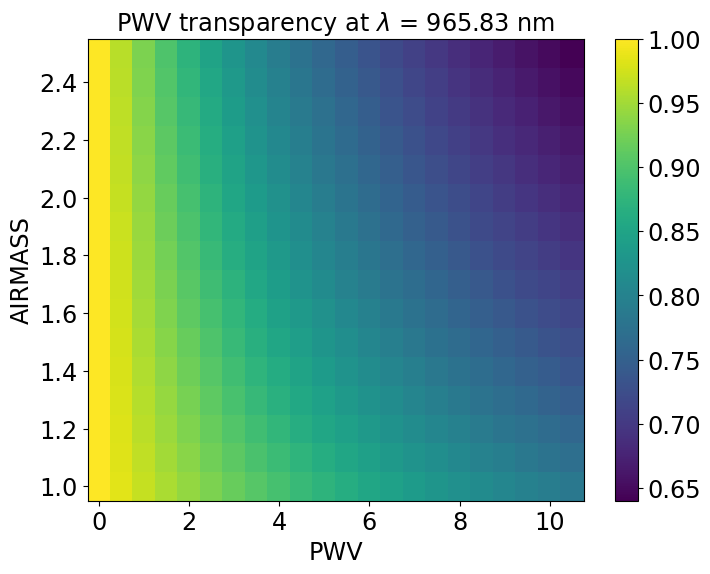

In [62]:
c=plt.pcolor(XX, YY, Z)
plt.colorbar(c)
plt.xlabel("PWV")
plt.ylabel("AIRMASS")
the_title = f"PWV transparency at $\lambda$ = {the_wl:.2f} nm"
plt.title(the_title)

https://stackoverflow.com/questions/21836067/interpolate-3d-volume-with-numpy-and-or-scipy

In [63]:
fn_H2Oabs_train = RegularGridInterpolator((WL,AIRMASS,PWV),data_H2Oabs_training)

In [64]:
tab = np.zeros((NAM,NPWV))

In [65]:
for idx_am,am in enumerate(AIRMASS):
    for idx_pwv,pwv in enumerate(PWV):
        tab[idx_am,idx_pwv] = fn_H2Oabs_train([the_wl,am,pwv])

Text(0.5, 1.0, 'PWV transparency at $\\lambda$ = 965.83 nm')

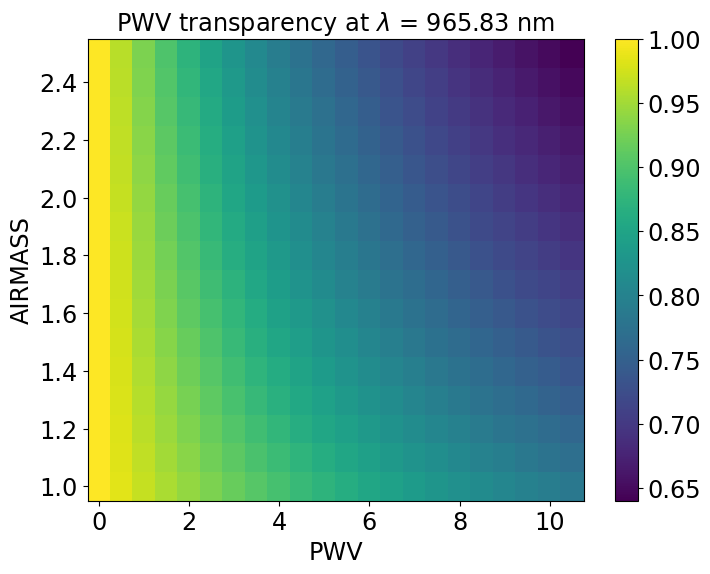

In [66]:
c=plt.pcolor(XX, YY, tab)
plt.colorbar(c)
plt.xlabel("PWV")
plt.ylabel("AIRMASS")
the_title = f"PWV transparency at $\lambda$ = {the_wl:.2f} nm"
plt.title(the_title)

Text(0.5, 1.0, 'PWV transparency at $\\lambda$ = 965.83 nm')

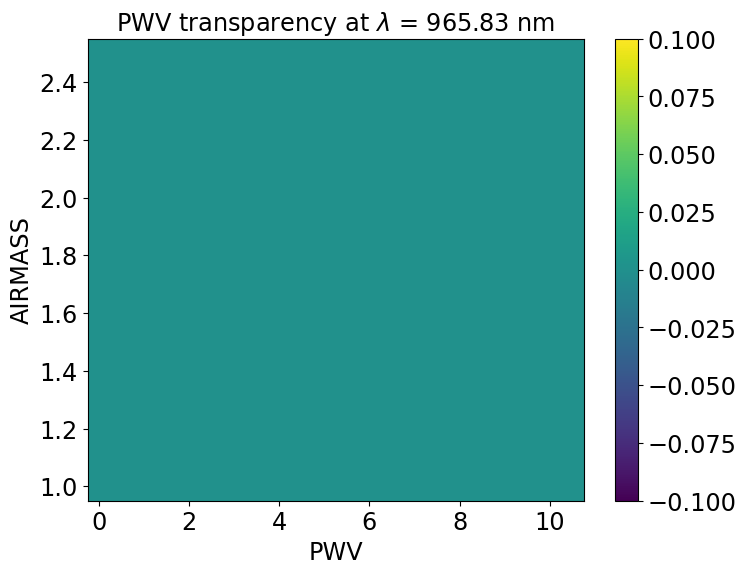

In [67]:
c=plt.pcolor(XX, YY, tab-Z)
plt.colorbar(c)
plt.xlabel("PWV")
plt.ylabel("AIRMASS")
the_title = f"PWV transparency at $\lambda$ = {the_wl:.2f} nm"
plt.title(the_title)

## Interpolate Ozone

In [68]:
X = OZ

In [69]:
Y = AIRMASS

In [70]:
XX,YY = np.meshgrid(X,Y)

In [71]:
idx_wl = 300
the_wl=WL[idx_wl]

In [72]:
data_OZabs_training_at300 = data_OZabs_training[idx_wl,:,:]
Z= data_OZabs_training_at300

Text(0.5, 1.0, 'Ozone transparency at $\\lambda$ = 600.38 nm')

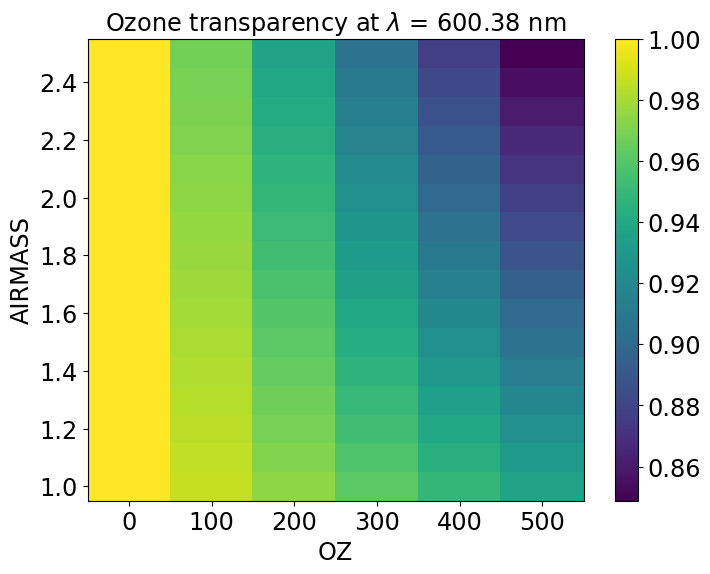

In [73]:
c=plt.pcolor(XX, YY, Z)
plt.colorbar(c)
plt.xlabel("OZ")
plt.ylabel("AIRMASS")
the_title = f"Ozone transparency at $\lambda$ = {the_wl:.2f} nm"
plt.title(the_title)

In [74]:
fn_OZabs_train = RegularGridInterpolator((WL,AIRMASS,OZ),data_OZabs_training)

In [75]:
tab = np.zeros((NAM,NOZ))

In [76]:
for idx_am,am in enumerate(AIRMASS):
    for idx_oz,oz in enumerate(OZ):
        tab[idx_am,idx_oz] = fn_OZabs_train([the_wl,am,oz])

Text(0.5, 1.0, 'Ozone transparency at $\\lambda$ = 600.38 nm')

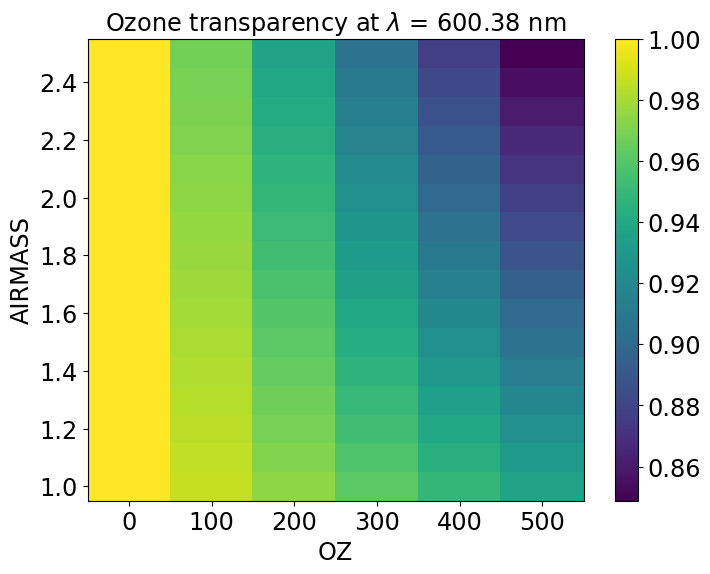

In [77]:
c=plt.pcolor(XX, YY, tab)
plt.colorbar(c)
plt.xlabel("OZ")
plt.ylabel("AIRMASS")
the_title = f"Ozone transparency at $\lambda$ = {the_wl:.2f} nm"
plt.title(the_title)